0.39216536396335877


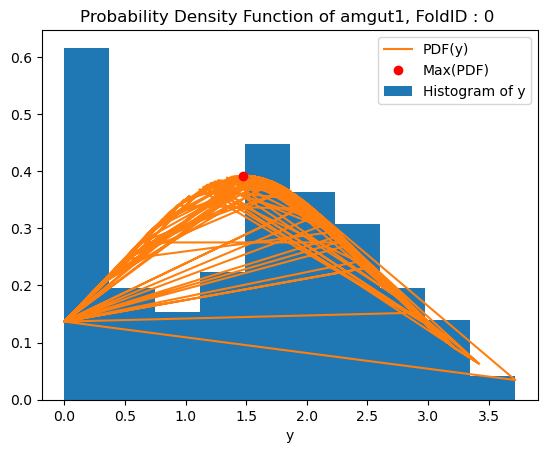

0.39144905787877515


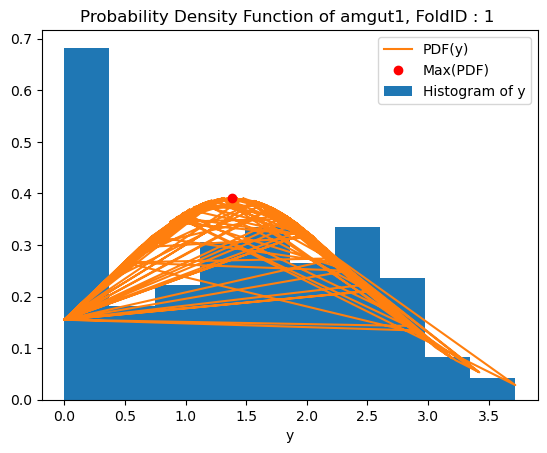

0.4118666748472116


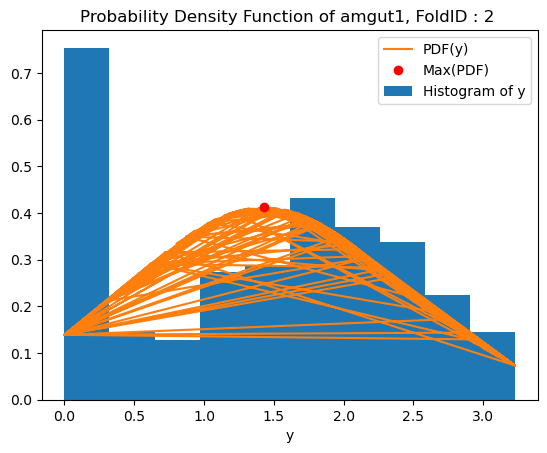

0.4006062587792607


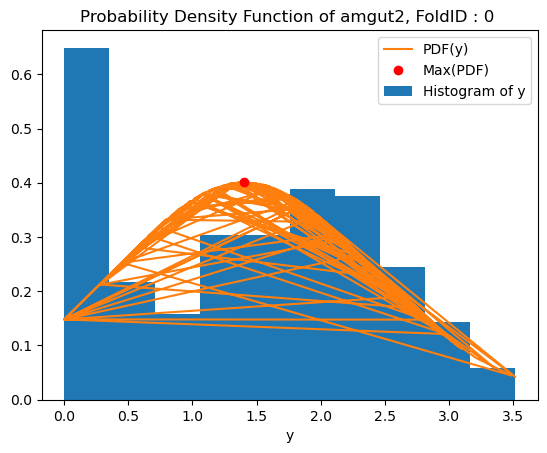

0.39530976161476455


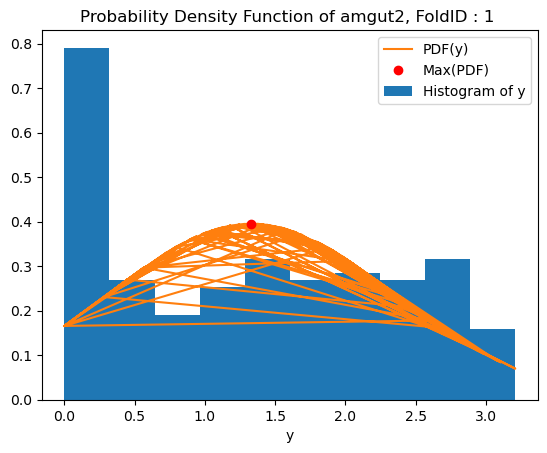

0.3984271716584088


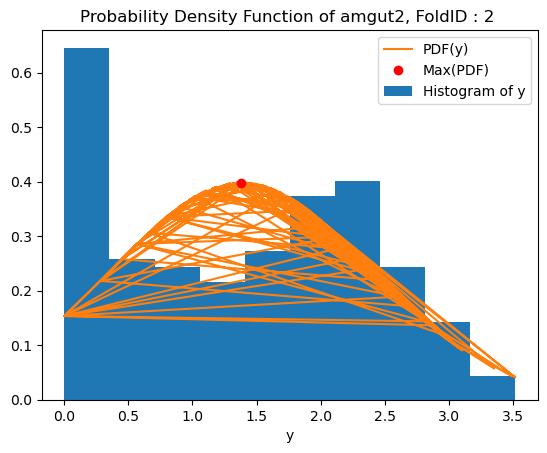

0.40420662827964554


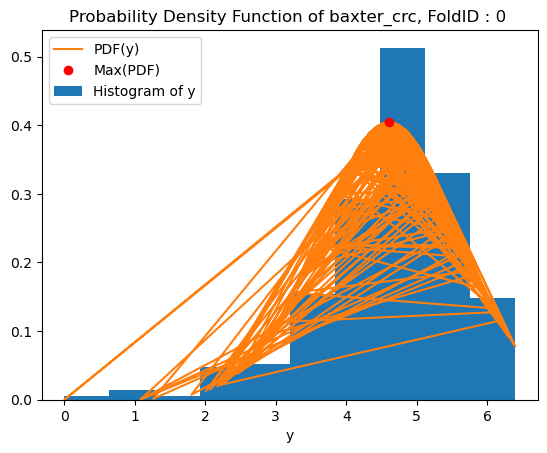

0.4017446808778348


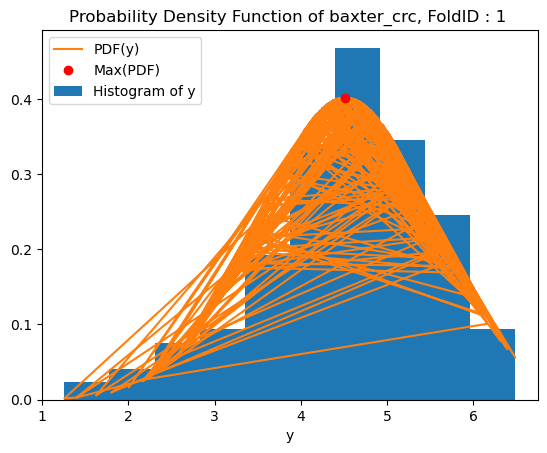

0.39023740657660494


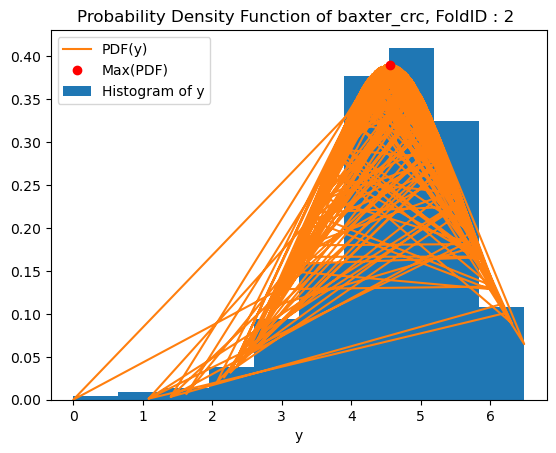

0.36968426240870056


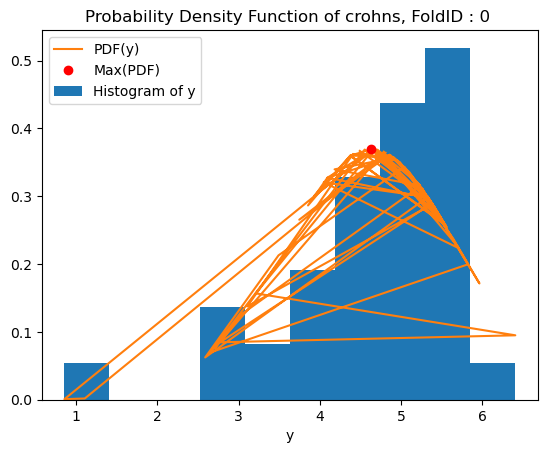

0.4153895157835967


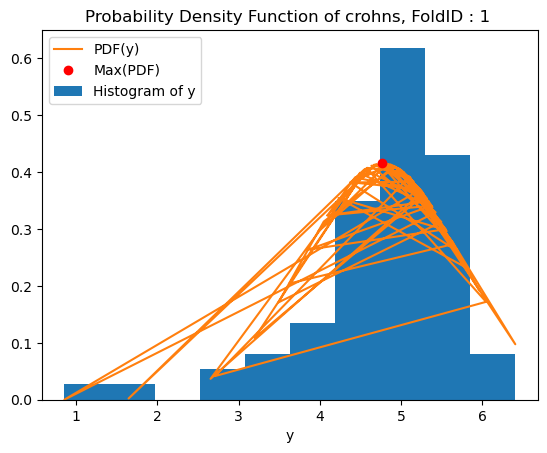

0.40907351954129745


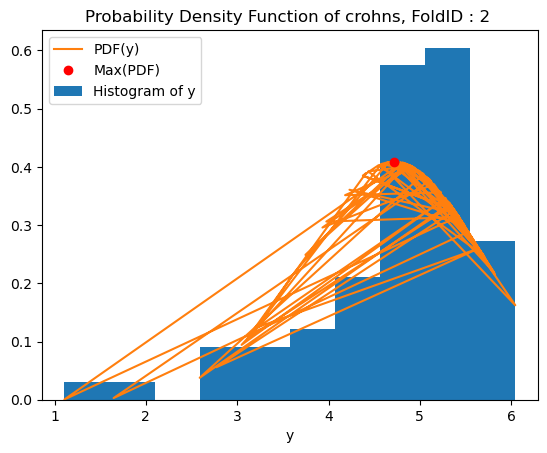

0.39656064026640825


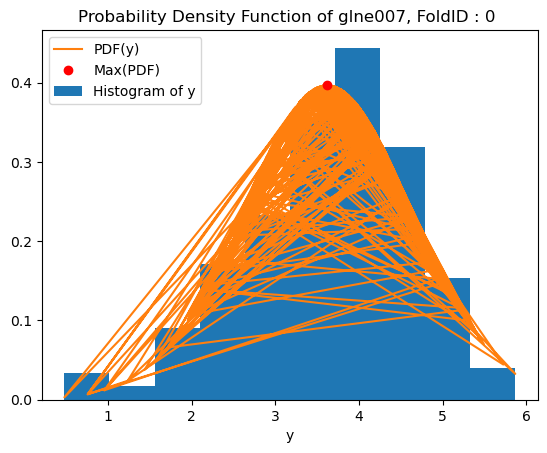

0.4148474263913034


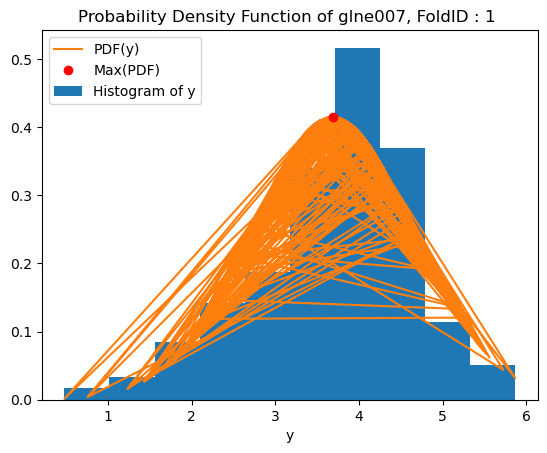

0.3866944139948714


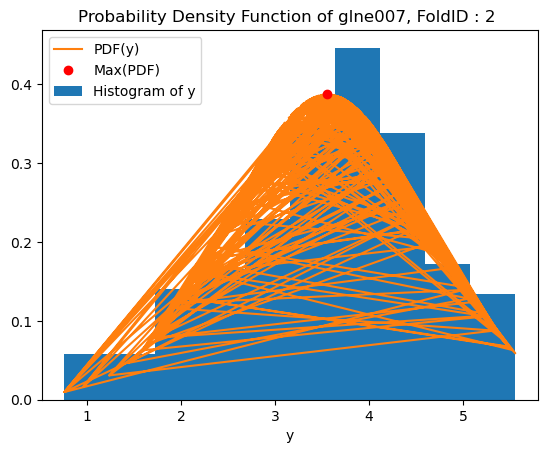

0.39435450415265505


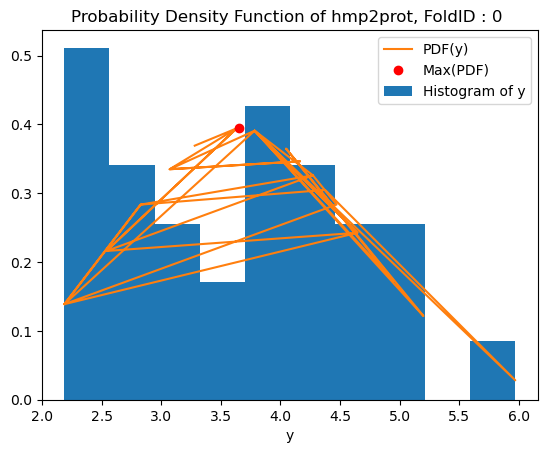

0.41330098806664367


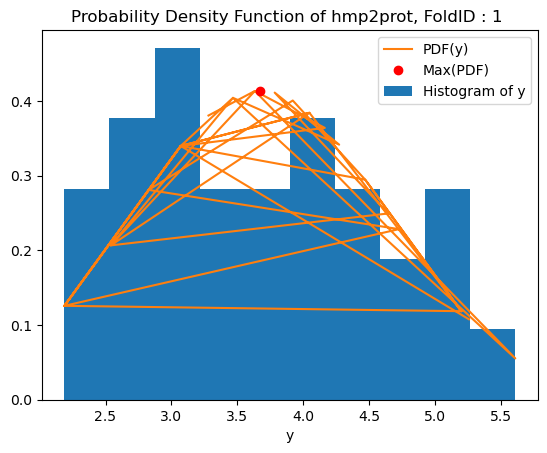

0.3731926795363607


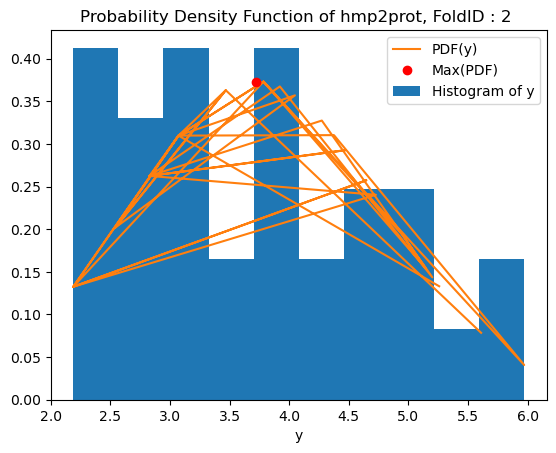

0.5402128533600998


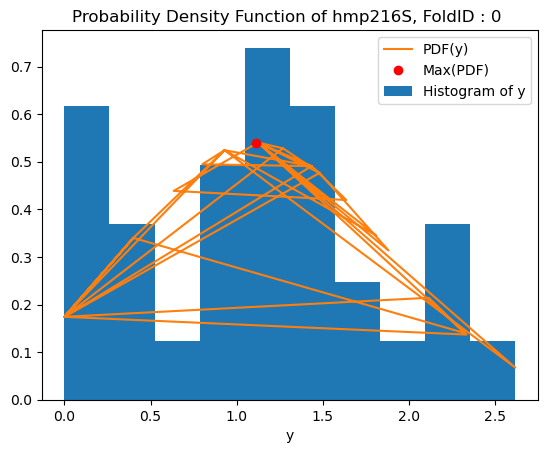

0.36886544398279436


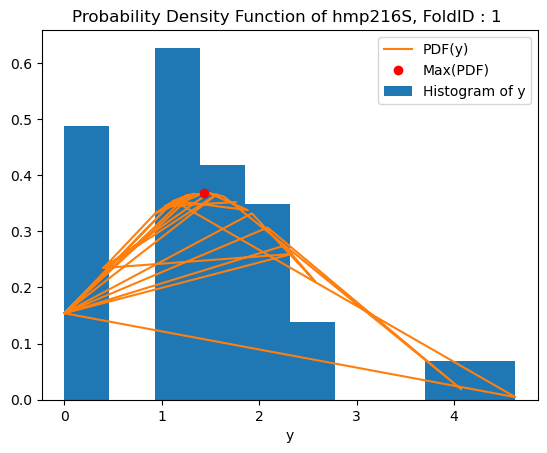

0.3486822250250433


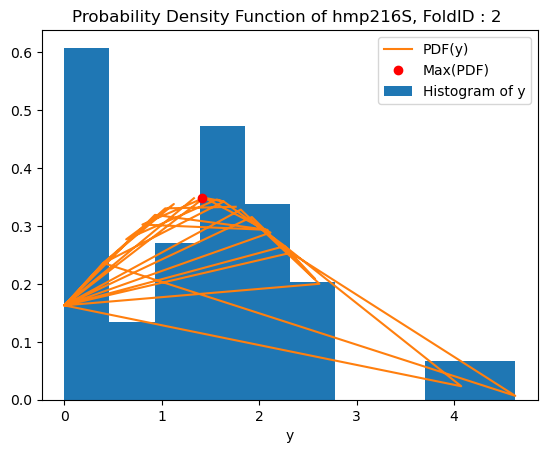

0.4068182317048892


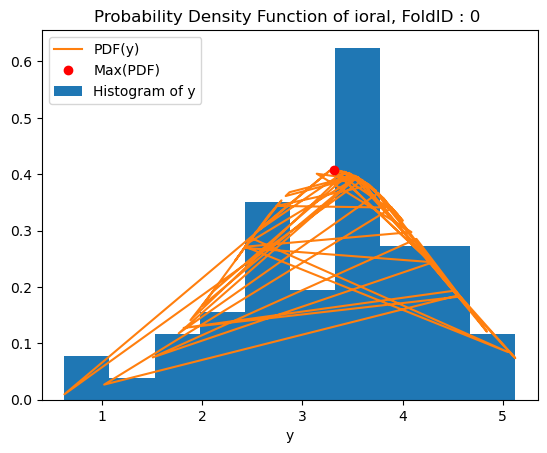

0.39121611667644485


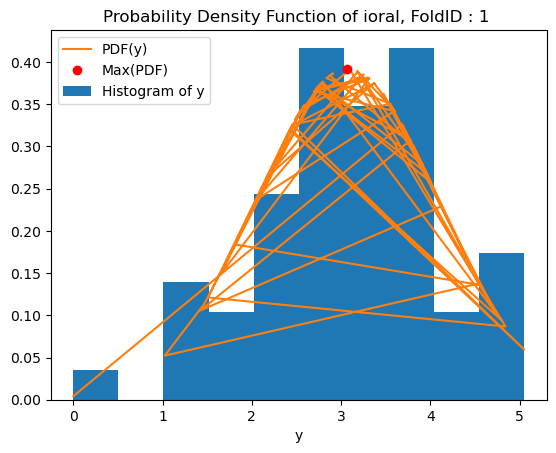

0.3947098563708089


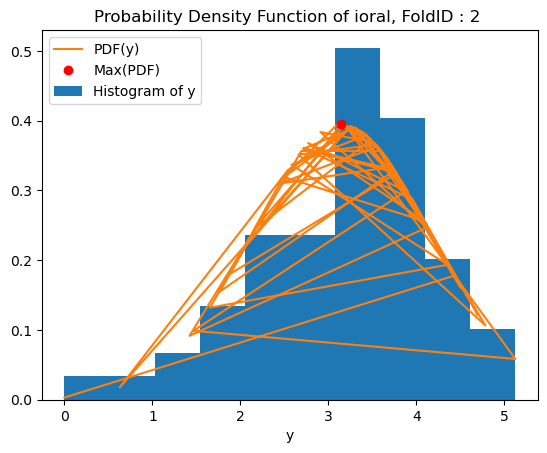

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from sklearn.model_selection import KFold



dataset_dict = {
     "amgut1": "/home/da2343/cs685_fall22/data/amgut1_data_log_standard_scaled_transformed.csv",
    "amgut2": "/home/da2343/cs685_fall22/data/amgut2_data_log_standard_scaled_transformed.csv",
    "baxter_crc": "/home/da2343/cs685_fall22/data/baxter_crc_data_log_standard_scaled_transformed.csv",
    "crohns": "/home/da2343/cs685_fall22/data/crohns_data_log_standard_scaled_transformed.csv",
    "glne007": "/home/da2343/cs685_fall22/data/glne007_data_log_standard_scaled_transformed.csv",
    "hmp2prot": "/home/da2343/cs685_fall22/data/hmp2prot_data_log_standard_scaled_transformed.csv",
    "hmp216S": "/home/da2343/cs685_fall22/data/hmp216S_data_log_standard_scaled_transformed.csv",
    'ioral': '/home/da2343/cs685_fall22/data/ioral_data_log_standard_scaled_transformed.csv',
}
index_of_pred_col = 0
n_splits = 3


for dataset_name, dataset_path in dataset_dict.items():
    dataset_pd = pd.read_csv(dataset_path, header=0)
    sub_data_dict = {}
    # drop only one column per every iteration to form the input matrix
    # make the column you removed the output
    # print the size of the input matrix
    output_vec = dataset_pd.iloc[:, index_of_pred_col].to_frame().to_numpy().ravel()
    input_mat = dataset_pd.drop(dataset_pd.columns[index_of_pred_col], axis=1).to_numpy()


    data_tuple = (input_mat, output_vec, index_of_pred_col)

    (input_mat, output_vec, index_col) = data_tuple
    k_fold = KFold(n_splits=n_splits, shuffle=True, random_state=1)
    for fold_id, indices in enumerate(k_fold.split(input_mat)):
        index_dict = dict(zip(["train", "test"], indices))
        set_data_dict = {}
        for set_name, index_vec in index_dict.items():
            set_data_dict[set_name] = {
                "X": input_mat[index_vec],
                "y": output_vec[index_vec]
            }
            
        X = set_data_dict["train"]["X"]
        y = set_data_dict["train"]["y"]
        
        pdf = lambda X: multivariate_normal.pdf(X, mean= np.mean(X) , cov=np.cov(X, rowvar=False), allow_singular= True)
        
        y_pdf_mean = np.mean(y)
                 
        
        y_pdf = pdf(y)
        y_pdf_max = np.max(y_pdf)
        print(y_pdf_max)
        
        fig1  = plt.figure()
        ax = fig1.add_subplot(111)
        ax.hist(y, density=True)
        ax.set_title(f"Probability Density Function of {dataset_name}, FoldID : {fold_id} ")
        ax.set_xlabel("y")
        # ax.set_ylabel("PDF(y)")
        ax.plot(y, y_pdf )
        # smooth the pdf curve
        ax.plot(y_pdf_mean, y_pdf_max, 'ro')
        ax.legend(["PDF(y)", "Max(PDF)", "Histogram of y"])
        plt.show()  

   
